**For data source click** <a href="https://archive.ics.uci.edu/ml/datasets/Hepatitis">Here<a/>

<br/> Author **Shereef Bankole**
<br/> **LinkedIn click** <a href="https://www.linkedin.com/in/shereef-b-b9aab823/\">Here<a/>
<br/> **Github click**  <a href="https://github.com/SAB-6\">Here<a/>

## Table of contents
- [Project objectives](#Project-objectives)
- [Data exploration](#Exploratory-data-analysis)
- [Data Wrangling](#Data-wrangling)
- [Data modelling](#Modelling)
- [Model Evaluation](#Model-evaluation)

## Import Required libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams.update({'font.size': 18})
!pip install lazypredict
from sklearn.pipeline import make_pipeline, Pipeline
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [6]:
np.random.seed(42)

In [136]:
from sklearn.pipeline import make_pipeline, Pipeline

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data

--2020-10-15 10:24:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7545 (7.4K) [application/x-httpd-php]
Saving to: ‘hepatitis.data’

hepatitis.data      100%[===================>]   7.37K  --.-KB/s    in 0s      

2020-10-15 10:24:03 (113 MB/s) - ‘hepatitis.data’ saved [7545/7545]



In [3]:
!ls

hepatitis.data	sample_data


In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Project objectives

Predicting patient mortality due to hepatitis

## Exploratory data analysis/Data wrangling

In [4]:
data= pd.read_table('hepatitis.data', sep =',')
data.columns = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM",
                "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN",
                "PROTIME", "HISTOLOGY"]
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [5]:
# shuffle data
data = data.sample(frac = 1).reset_index(drop =True)

In [30]:
# Inspecting the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            154 non-null    int64 
 1   age              154 non-null    int64 
 2   sex              154 non-null    int64 
 3   steroid          154 non-null    object
 4   antivirals       154 non-null    int64 
 5   fatigue          154 non-null    object
 6   malaise          154 non-null    object
 7   anorexia         154 non-null    object
 8   liver_big        154 non-null    object
 9   liver_firm       154 non-null    object
 10  spleen_palpable  154 non-null    object
 11  spiders          154 non-null    object
 12  ascites          154 non-null    object
 13  varices          154 non-null    object
 14  bilirubin        154 non-null    object
 15  alk_phosphate    154 non-null    object
 16  sgot             154 non-null    object
 17  albumin          154 non-null    ob

In [31]:
# replace missing values (np.nan) with zeros
data = data.replace("?",np.nan)

### Both info and isnull methods did notr reveal the missing values within each attributes.  However, <a href ="https://archive.ics.uci.edu/ml/datasets/Hepatitis">the data source indicates presence of missing values within the dataset</a>.

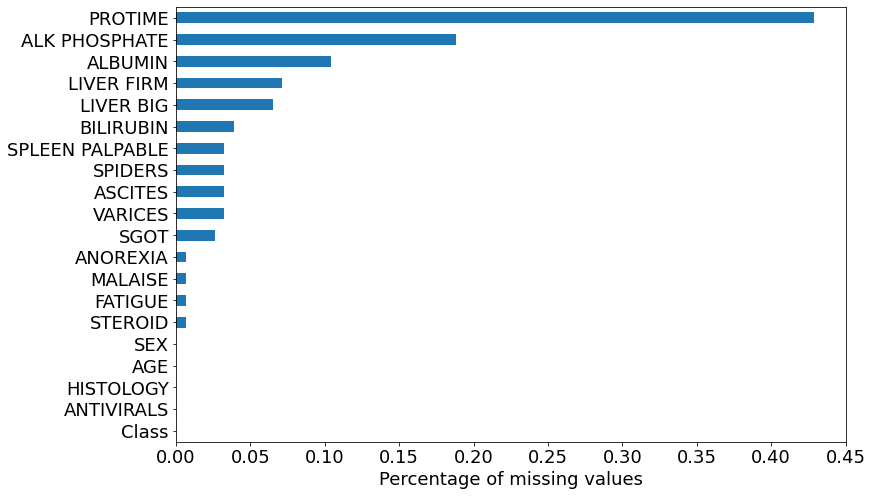

In [35]:
(data.isnull().sum().sort_values()/len(data)).plot(kind = 'barh');
plt.xlabel("Percentage of missing values");

#### From the bar chart above, sex, age, histology, antivirals nad class attributes have no missing value. Missing values for other attributes varies from very few percentage to more than 40%

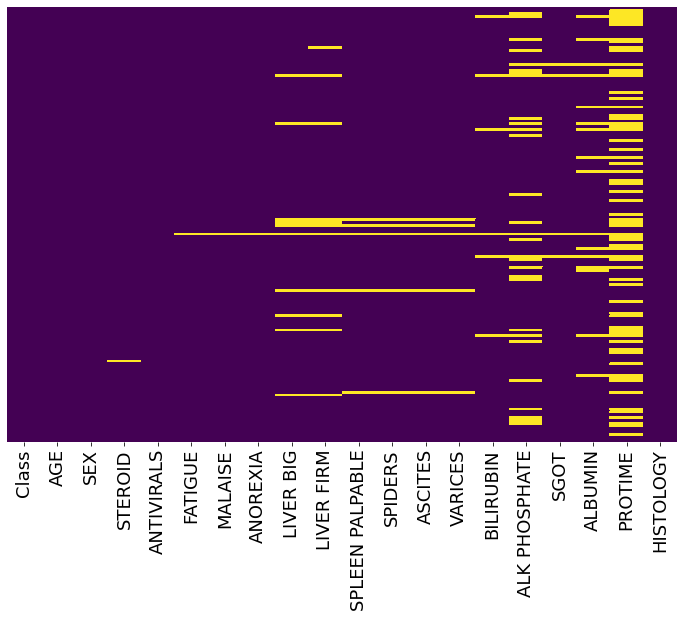

In [34]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [47]:
data["class"].value_counts()

2    122
1     32
Name: class, dtype: int64

In [ ]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,28,2,2,2,1,1,2,2,1,2,2,2,2,1.80,191,420,3.3,46,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,24,1,1,2,1,2,2,2,2,2,2,2,2,1.00,0,34,4.1,0,2
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0,0,86,0,0,1
4,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.20,102,53,4.3,0,1


In [21]:
df = data.copy()

In [24]:
data = data.replace(np.nan, 0)

In [36]:
# replace missing values (np.nan) with zeros
data = data.replace("?",0)

# change some of the column to int type
int_columns = [col for col in list(data.columns) if data[col].dtypes != int if col not in ("bilirubin","albumin")]
data[int_columns] = data[int_columns].astype(int)

# change both bilirubin and albumin columns to float
data[['bilirubin','albumin']] = data[['bilirubin','albumin']].astype(float)
# check the data types
data.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [37]:
data.isnull().sum().sort_values()

class              0
albumin            0
sgot               0
alk_phosphate      0
bilirubin          0
varices            0
ascites            0
spiders            0
spleen_palpable    0
liver_firm         0
liver_big          0
anorexia           0
malaise            0
fatigue            0
antivirals         0
steroid            0
sex                0
age                0
protime            0
histology          0
dtype: int64

In [51]:
data["class"] = data["class"].map({1:1, 2:0})

In [57]:
data["class"].value_counts()

0    122
1     32
Name: class, dtype: int64

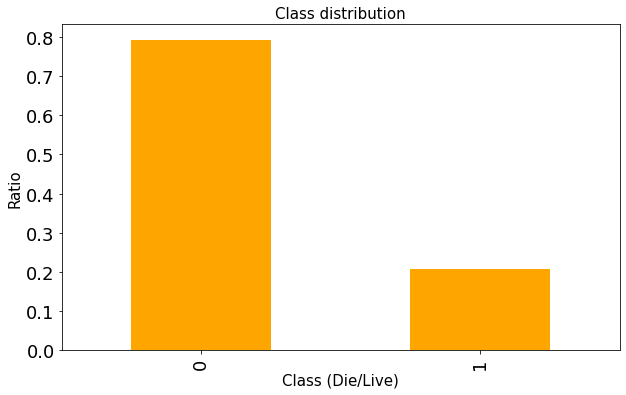

In [58]:
# Check for class imbalance in the target variable
(data['class'].value_counts()/len(data)).plot(kind='bar', color = 'orange',figsize=(10, 6), stacked=False)
plt.xlabel("Class (Die/Live)", fontsize=15)
plt.ylabel('Ratio', fontsize=15)
plt.title("Class distribution", fontsize=15);

### The target is skewed as indicated by the class distribution plot above. 2 represents the people tha lives while 1 represents those tha dies from hepatitis.

In [59]:
data.age.max()

78

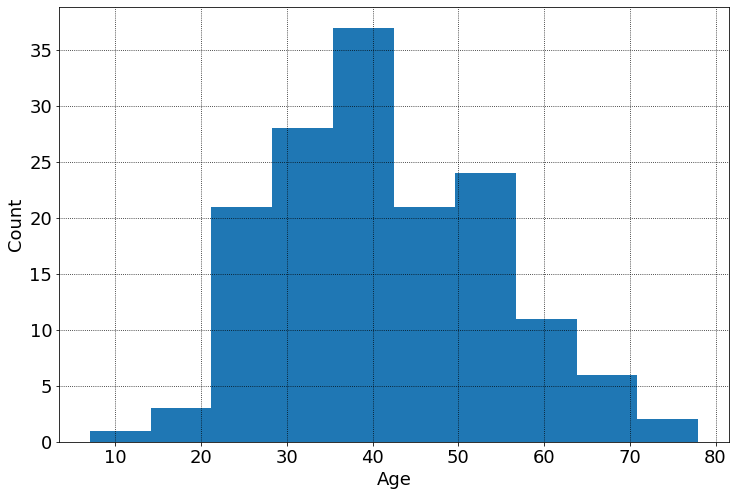

In [60]:
#Age distribution
data["age"].hist()
plt.xlabel('Age')
plt.ylabel('Count');

### Age distribution shows normal distribution

In [ ]:
# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

In [ ]:
# data.columns[data.dtypes=='O'].nunique()

1   0.90
2   0.10
Name: sex, dtype: float64

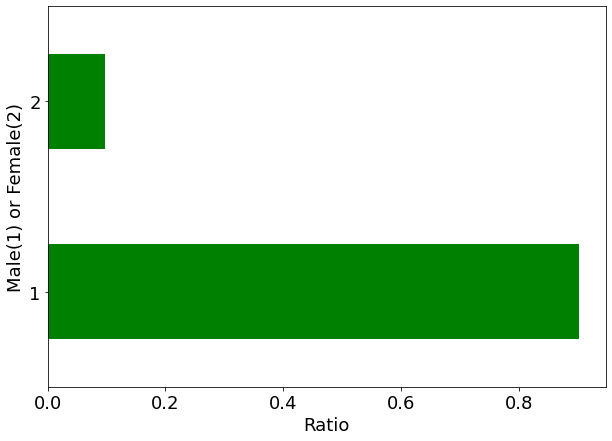

In [62]:
(data.sex.value_counts()/len(data)).plot(kind = "barh", figsize =(10,7), color = "green")
plt.xlabel("Ratio")
plt.ylabel("Male(1) or Female(2)");
data.sex.value_counts()/len(data)

#### Thee ratio of male to female is 9 to 1

In [65]:
# descriptive statistics
data.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00,154.00
mean,0.21,41.27,1.10,1.50,1.84,1.34,1.59,1.78,1.71,1.47,1.74,1.60,1.81,1.82,1.37,85.62,84.10,3.42,35.34,1.45
std,0.41,12.57,0.30,0.51,0.36,0.49,0.51,0.43,0.58,0.63,0.51,0.55,0.47,0.46,1.22,62.26,89.66,1.32,35.22,0.50
min,0.00,7.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,32.00,1.00,1.00,2.00,1.00,1.00,2.00,2.00,1.00,2.00,1.00,2.00,2.00,0.70,50.50,31.00,3.02,0.00,1.00
50%,0.00,39.00,1.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,83.00,56.50,3.90,35.00,1.00
75%,0.00,50.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.50,119.75,99.50,4.20,65.50,2.00
max,1.00,78.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,8.00,295.00,648.00,6.40,100.00,2.00


In [66]:
# Check features correlation with the target 
correlation = data.corr()
correlation.iloc[:,0].sort_values(ascending = False)

class              1.00
bilirubin          0.42
histology          0.34
age                0.22
antivirals         0.13
sgot               0.05
alk_phosphate      0.05
liver_big         -0.11
anorexia          -0.11
steroid           -0.12
liver_firm        -0.15
protime           -0.16
sex               -0.17
spleen_palpable   -0.18
varices           -0.25
fatigue           -0.29
albumin           -0.30
malaise           -0.31
spiders           -0.33
ascites           -0.33
Name: class, dtype: float64

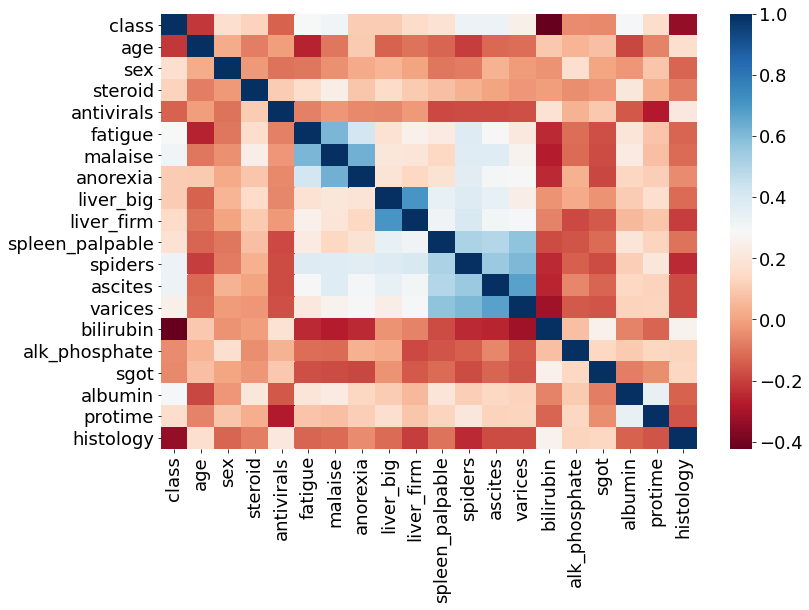

In [ ]:
# heatmap to highlight correction between features and the target
_= sns.heatmap(data[list(data.columns)].corr(), cmap='RdBu', annot= False)

In [67]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
databy_age = pd.cut(
        data["age"], bins = 8, labels = labels
    )

In [68]:
databy_age.value_counts()/len(data)

30-40          0.31
40-50          0.21
20-30          0.20
50-60          0.12
10-20          0.07
60-70          0.06
70 and more    0.02
Less than 10   0.01
Name: age, dtype: float64

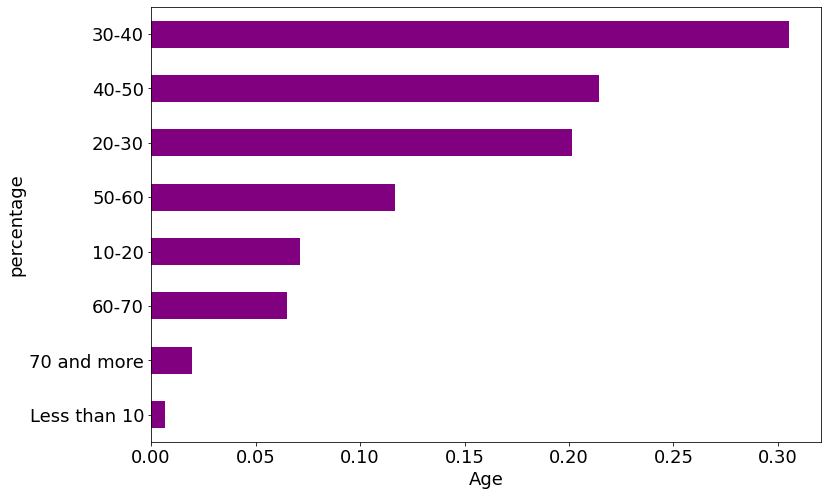

In [73]:
(databy_age.value_counts()/len(data)).sort_values(ascending=True).plot(kind="barh", color ='purple')
plt.xlabel("Age")
plt.ylabel("percentage");

In [ ]:
list(data.columns)

['class',
 'age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

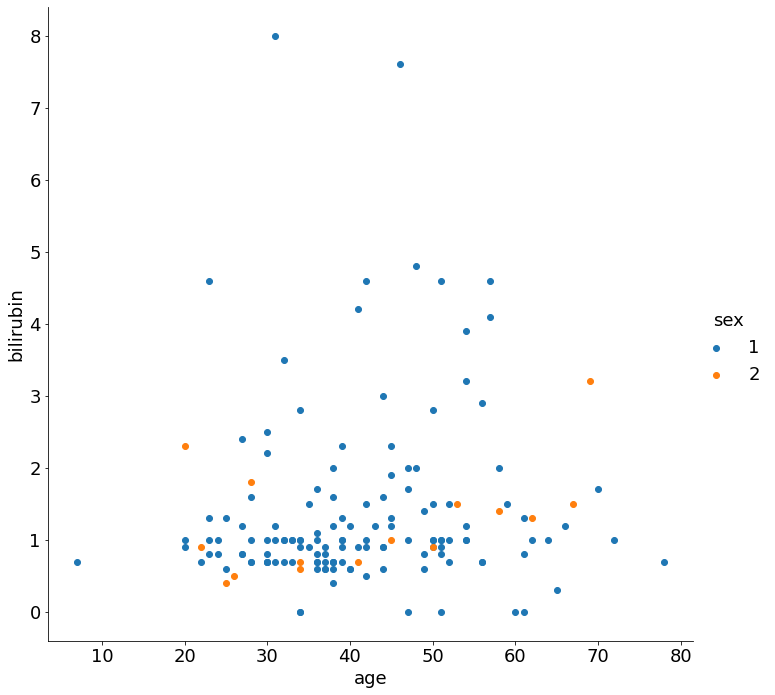

In [74]:
# Scatter plot
# sns.scatterplot(x=data['albumin'],y=df['age'],hue=data['sex'], palette=['green','red'],data=data)
grid = sns.FacetGrid(data[["age", "bilirubin", "sex"]], hue="sex", size = 10)
grid.map(plt.scatter,"age","bilirubin").add_legend();

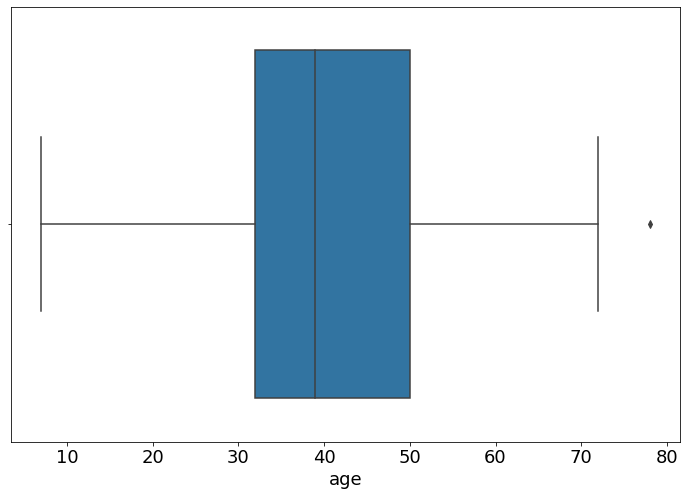

In [ ]:
## Checking for outlier
sns.boxplot(data.age);

In [75]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
print(IQR)

class              0.00
age               18.00
sex                0.00
steroid            1.00
antivirals         0.00
fatigue            1.00
malaise            1.00
anorexia           0.00
liver_big          0.00
liver_firm         1.00
spleen_palpable    0.00
spiders            1.00
ascites            0.00
varices            0.00
bilirubin          0.80
alk_phosphate     69.25
sgot              68.50
albumin            1.18
protime           65.50
histology          1.00
dtype: float64


In [76]:
# No of outliers per column
((data < (q1 -1.5 * IQR)) | (data >(q3 + 1.5 * IQR))).sum()

class              32
age                 1
sex                15
steroid             0
antivirals         24
fatigue             0
malaise             0
anorexia           33
liver_big          34
liver_firm          0
spleen_palpable    35
spiders             0
ascites            25
varices            23
bilirubin          17
alk_phosphate       5
sgot               13
albumin            17
protime             0
histology           0
dtype: int64

In [77]:
features = [col for col in data.columns if col not in "class"]
features

['age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

In [78]:
# Remove outliers
data_no_outlier = (data[~((data[features] < (q1 -1.5 * IQR)) | (data[features] >(q3 + 1.5 * IQR))).any(axis=1)]).reset_index(drop = True)
data_no_outlier.head(20)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,0,24,1,1,2,1,2,2,2,2,2,2,2,2,1.00,0,34,4.10,0,2
1,0,66,1,2,2,1,2,2,2,2,2,2,2,2,1.20,102,53,4.30,0,1
2,0,52,1,1,2,1,2,2,2,2,2,2,2,2,1.00,85,30,4.00,0,2
3,0,32,1,2,2,2,2,2,2,2,2,2,2,2,0.70,102,64,4.00,90,1
4,0,20,1,1,2,2,2,2,2,0,2,2,2,2,0.90,89,152,4.00,0,2
5,0,27,1,2,2,2,2,2,2,2,2,2,2,2,0.80,0,38,4.20,0,1
6,0,42,1,2,2,2,2,2,2,2,2,2,2,2,0.90,60,63,4.70,47,1
7,0,49,1,2,2,1,1,2,2,2,2,2,2,2,0.80,103,43,3.50,66,1
8,0,31,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,20,4.00,100,1
9,0,35,1,2,2,1,2,2,2,2,2,2,2,2,0.90,58,92,4.30,73,1


In [ ]:
#data_no_outlier = data[~((data < (q1 -1.5 * IQR)) | (data >(q3 + 1.5 * IQR))).any(axis=1)]
#data_no_outlier.head(20)

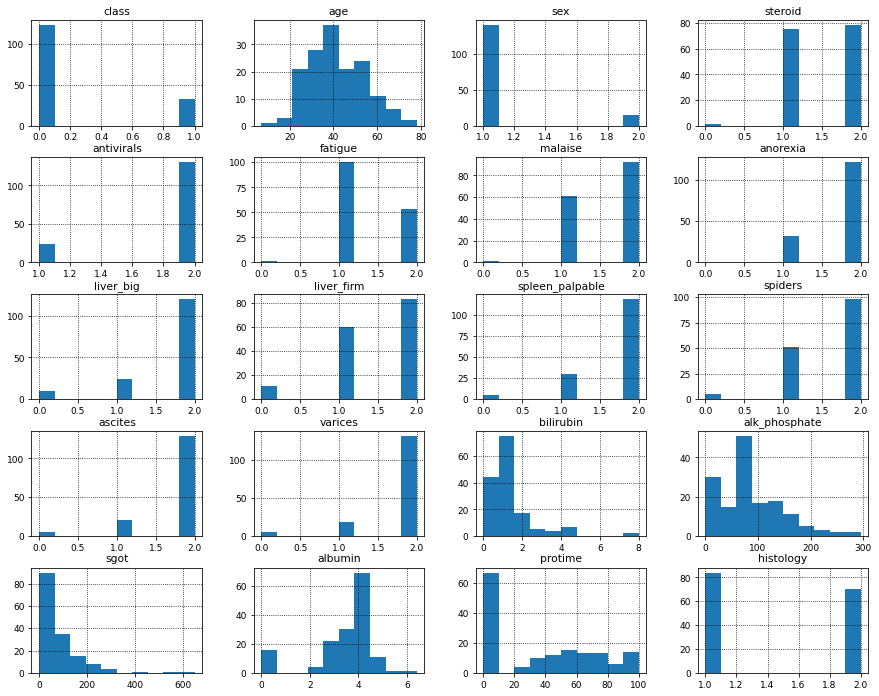

In [79]:
mpl.rcParams['figure.figsize'] = [15, 12]
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams.update({'font.size': 9})
data.hist();

## Data modelling

In [ ]:
# from sklearn.datasets import load_breast_cancer
# df = load_breast_cancer()
# X = df.data
# y= df.target
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
# #clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# print(X_train)
# print(y_train)

In [80]:
features_col = list(data.columns)[1:]
target_col = ["class"] 
features = data[features_col]
target = data[target_col]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    features,target,test_size= 0.3,
    stratify=target,random_state=42
    )
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 30/30 [00:00<00:00, 31.77it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.83,0.86,0.86,0.84,0.01
NearestCentroid,0.79,0.83,0.83,0.80,0.02
AdaBoostClassifier,0.85,0.80,0.80,0.85,0.09
PassiveAggressiveClassifier,0.85,0.80,0.80,0.85,0.01
BaggingClassifier,0.87,0.77,0.77,0.87,0.03
LogisticRegression,0.85,0.76,0.76,0.85,0.02
LinearSVC,0.85,0.76,0.76,0.85,0.02
SGDClassifier,0.83,0.75,0.75,0.83,0.01
RidgeClassifier,0.83,0.75,0.75,0.83,0.02


In [85]:
y_train

,class
147,0
78,0
39,1
85,0
118,0
...,...
67,1
34,0
50,0
124,0


In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    features,target,test_size= 0.3,
    stratify=target,random_state=42
    )

In [87]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.56      0.50      0.53        10

    accuracy                           0.81        47
   macro avg       0.71      0.70      0.70        47
weighted avg       0.80      0.81      0.80        47



In [90]:
y_train.shape, X_train.shape

((107, 1), (107, 19))

In [89]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.71      0.50      0.59        10

    accuracy                           0.85        47
   macro avg       0.79      0.72      0.75        47
weighted avg       0.84      0.85      0.84        47



In [91]:
# drop protime column
X_train_1 = X_train.drop("protime", axis =1)
X_train_1.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology
147,52,1,1,2,2,2,2,2,2,2,2,2,2,1.50,0,69,2.90,2
78,65,1,2,2,1,1,2,2,1,1,1,1,2,0.30,180,53,2.90,2
39,42,1,1,2,1,1,1,2,2,1,1,2,1,4.60,0,55,3.30,2
85,37,1,1,2,1,1,1,2,2,2,2,2,2,0.80,92,59,0.00,1
118,23,1,2,2,1,1,1,2,2,2,2,2,2,0.80,0,14,4.80,1


In [92]:
lr = LogisticRegression()
lr.fit(X_train_1,y_train)
X_test_1 = X_test.drop("protime", axis=1)
pred_lr = lr.predict(X_test_1)
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.60      0.60      0.60        10

    accuracy                           0.83        47
   macro avg       0.75      0.75      0.75        47
weighted avg       0.83      0.83      0.83        47



In [93]:
rf = RandomForestClassifier()
rf.fit(X_train_1,y_train)
pred_rf = rf.predict(X_test_1)
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        37
           1       0.80      0.40      0.53        10

    accuracy                           0.85        47
   macro avg       0.83      0.69      0.72        47
weighted avg       0.84      0.85      0.83        47



## Features selection

In [100]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [126]:
list(data.columns)[1:]

['age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

In [102]:
features_col = list(data.columns)[1:]
target_col = ["class"] 
features = data[features_col]
target = data[target_col]

In [108]:
# using Skbest
skb = SelectKBest(score_func=chi2,k=5)
best_feature_fit = skb.fit(features,target)
# Highest score shows the best fit
print("Scores: ",best_feature_fit.scores_)

Scores:  [ 27.7100895    0.34920943   0.42076503   0.19084796   2.28634808
   2.43463115   0.19099258   0.34234119   0.95514018   0.73343834
   3.154178     2.08420804   1.11903176  29.95678238  17.88875131
  43.25275806   6.8249348  135.17120971   2.96410733]


In [109]:
score = pd.DataFrame(best_feature_fit.scores_, columns = ["score"])
feat = pd.DataFrame(features_col, columns = ["feature_names"])
feat_scores = pd.concat([feat, score], axis = 1)
feat_scores.nlargest(10, "score" )

,feature_names,score
17,protime,135.17
15,sgot,43.25
13,bilirubin,29.96
0,age,27.71
14,alk_phosphate,17.89
16,albumin,6.82
10,spiders,3.15
18,histology,2.96
5,malaise,2.43
4,fatigue,2.29


In [114]:
data[]

,protime,sgot,bilirubin,age,alk_phosphate,albumin,spiders,histology,malaise,fatigue
0,46,420,1.80,28,191,3.30,2,1,1,1
1,0,42,0.90,50,135,3.50,2,1,2,1
2,0,34,1.00,24,0,4.10,2,2,2,1
3,0,86,0.00,34,0,0.00,2,1,2,2
4,0,53,1.20,66,102,4.30,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...
149,54,249,1.00,32,59,3.70,1,1,2,1
150,0,30,1.00,54,85,4.50,2,2,2,2
151,0,16,1.20,38,118,2.80,1,2,1,1
152,29,54,3.50,32,215,3.40,1,1,1,1


In [116]:
features_col = list(data.columns)[1:]
target_col = ["class"] 
features = data[features_col]
target = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    features,target,test_size= 0.3,
    stratify=target,random_state=42
    )

In [117]:
lr_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'), StandardScaler(),
                         LogisticRegression())

lr_pipeline.fit(X_train,y_train)
preds = lr_pipeline.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.67      0.60      0.63        10

    accuracy                           0.85        47
   macro avg       0.78      0.76      0.77        47
weighted avg       0.85      0.85      0.85        47



In [118]:
lr_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'), StandardScaler(),
                         LogisticRegression())

lr_pipeline.fit(X_train,y_train)
preds = lr_pipeline.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.67      0.60      0.63        10

    accuracy                           0.85        47
   macro avg       0.78      0.76      0.77        47
weighted avg       0.85      0.85      0.85        47



# Construct  model based on the first tthen selected features

In [120]:
#selected_features = list(feat_scores.nlargest(10, "score" )["feature_names"])
selected_features = feat_scores.nlargest(10, "score" ).iloc[:,0].to_list() #["protime","sgot","bilirubin", "age", "alk_phosphate", "albumin" ] 
X_train_1 = X_train[selected_features]
X_test_1 = X_test[selected_features]
lr = LogisticRegression()
lr.fit(X_train_1,y_train)
pred_lr = lr.predict(X_test_1)
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.67      0.60      0.63        10

    accuracy                           0.85        47
   macro avg       0.78      0.76      0.77        47
weighted avg       0.85      0.85      0.85        47



In [125]:
#selected_features = list(feat_scores.nlargest(10, "score" )["feature_names"])
selected_features1 = ["protime","sgot","bilirubin", "age", "alk_phosphate", "albumin" ]
X_train_1 = X_train[selected_features1]
X_test_1 = X_test[selected_features1]
lr = LogisticRegression()
lr.fit(X_train_1,y_train)
pred_lr = lr.predict(X_test_1)
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.56      0.50      0.53        10

    accuracy                           0.81        47
   macro avg       0.71      0.70      0.70        47
weighted avg       0.80      0.81      0.80        47



# Second pipeline

In [144]:
GradientBoostingClassifier?

In [141]:
scaler = StandardScaler()

In [143]:
# each of thesesticRegression(solver='liblinear', random_state= 42)
clf1 = LogisticRegression(solver='liblinear', random_state= 42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = GradientBoostingClassifier(validation_fraction=0.2,
                                  n_iter_no_change=5, tol=0.01,
                                  random_state=42)

In [142]:
pipe = Pipeline([('scaler',scaler), ('classifier', clf3)])

In [145]:
# create the parameter dictionary for clf1
params1 = {}
params1['classifier__penalty'] = ["l1", "l2", "none"]
params1['classifier__C'] = [0.1, 1, 10]
params1['classifier'] = [clf1]

In [146]:
# create the parameter dictionary for clf2
params2 = {}
params2['classifier__n_estimators'] = [100, 200,300]
params2['classifier__min_samples_leaf'] = [1, 2, 5, 10]
params2['classifier'] = [clf2]

In [147]:
# create the parameter dictionary for clf2
params3 = {}
params3['classifier__n_estimators'] = [100, 200,300]
params3['classifier__min_samples_leaf'] = [1, 2, 5, 10]
params3['classifier'] = [clf3]

In [148]:
# create a list of parameter dictionaries
params = [params1, params2, params3]

In [151]:
# This will search every parameter combination within each dictionary
grid = GridSearchCV(pipe, params, cv=5)
grid.fit(X_train, y_train)
best_param = grid.best_params_
best_estimator = grid.best_estimator_

In [152]:
best_estimator

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [153]:
best_param

{'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=200,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 200}

In [154]:
best_estimator.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [156]:
preds = best_estimator.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.71      0.50      0.59        10

    accuracy                           0.85        47
   macro avg       0.79      0.72      0.75        47
weighted avg       0.84      0.85      0.84        47

